<a href="https://colab.research.google.com/github/palakagl/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMAI 891: Individual Assignment

Version 1: Updated February 9, 2022

<font color='red'>\# TODO: fill in the below</font>

- [Palak, Agrawal]
- [20310675]
- [Section A]
- [Blink: The Power of Thinking Without Thinking, Book by Malcolm Gladwell]
- [27th April 2022]

# Assignment Instructions

This assignment contains one (1) question with multiple parts and one (1) optional question for bonus marks. The questions and parts are wholly contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers/solutions. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

## Questions

Each question has multiple tasks. There are two possible types of tasks: tasks that require you to write code and tasks that require you to write text responses. A grading rubric is provided on D2L for each question.

For tasks that require **code**:
- Use Python to complete the task.
- You may use standard Python libraries, including scikit-learn, pandas, and numpy.
- Tips:
  - Submit code that runs without errors.
  - Submit code that is reproducible. E.g., set random number seeds as appropriate. You should be able to run your code again and again and again, from the top of the file to the bottom of the file, and get the exact same results each time. I should be able to run your code, from scratch, again and again, and get the exact same results that you get.
  - Submit code that is organized. Make your code readable. Provide comments to describe what the code is doing and why. Don’t leave “old” code lying around. Overall, if your code is clear and easy to read, then we will be happy. When we are happy, we give better marks.

For tasks that require **text responses**:
- Type your response in Notebook cell indicated.
- Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly verbose.
- Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).
- You may refer to your code in your answer. Please do so very clearly. E.g., “As can be seen in on line X above …“


## What to Submit to the Course Portal

- You are to export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook (.ipynb) file to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file 21_891_FirstnameLastName.pdf
      - E.g., *21_891_StephenThomas.pdf*
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF, click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

In [ ]:
import datetime
import pandas as pd
import numpy as np

In [ ]:
print(datetime.datetime.now())

2022-04-28 17:28:06.083094


In [ ]:
!which python

/usr/local/bin/python


In [ ]:
!python --version

Python 3.7.13


In [ ]:
!echo $PYTHONPATH

/env/python


In [ ]:
# TODO: install any packages you need to here. For example:
!pip install unidecode
!pip install git+https://github.com/huggingface/transformers.git

In [ ]:
import pandas as pd
import io
import re
import nltk
import unidecode
from nltk.corpus import stopwords  
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingRegressor
from nltk.corpus import stopwords
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import itertools
from xgboost import XGBClassifier
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Question 1: Sentiment Analysis via Shallow ML


**Marking**

The coding parts (i.e., 1.a, 1.b, 1.c4) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 2 and 3 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


In [ ]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1b8MAiN-xBdk6scM-DnufkuijDZivZJqM")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2400 non-null   object
 1   Polarity  2400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.6+ KB


In [ ]:
df.head(10)
df.tail(10)

,Sentence,Polarity
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


,Sentence,Polarity
2390,Though The Wind and the Lion is told largely t...,1
2391,This is high adventure at its best.,1
2392,"I think it was Robert Ryans best film, because...",1
2393,Having to humour him just to get by and get th...,1
2394,(My mother and brother had to do this)When I s...,1
2395,Almost all of the songs in Cover Girl are old-...,0
2396,The most annoying thing about 'Cover Girl' is ...,0
2397,"Unfortunately, 'Cover Girl' is an example of h...",0
2398,Non-linear narration thus many flashbacks and ...,1
2399,The good cinematography also makes her and Mon...,1


In [ ]:
# Preprocessing the text 

def preprocess(s):
  s = df.Sentence
  for i in range(len(s)):
    #Removes anything thats not word or number
    s[i] = re.sub(r'\W',' ',s[i])
    #Remove single alphabets
    s[i] = re.sub(r'\s+[a-zA-Z]\s+',' ',s[i])
    #Remove digits
    s[i] = re.sub(r'\d',' ',s[i])
    #Remove space from first character
    s[i] = re.sub(r'^\s',' ',s[i])
    #Remove space from last character
    s[i] = re.sub(r'\s$',' ',s[i])
    #Remove extra spaces
    s[i] = re.sub(r'\s+',' ',s[i])
    return s

df.head(10)

# Removing Stop words and Lemmatizing the content was degrading model's performance
'''
stop_words = stopwords.words('english') 
lemmer = WordNetLemmatizer()

def preprocess(x):
    # Remove HTML tags
    x = BeautifulSoup(x, "lxml").get_text()

    # Lower case
    x = x.lower()
    
    # Remove punctuation
    x = re.sub(r'[^\w\s]', '', x)
    
    # Remove non-unicode
    x = unidecode.unidecode(x)
    
    # Remove numbers
    x = re.sub(r'\d+', '', x)
    
    # Remove stopwords and lemmatize
    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x) 

%time df['Sentence'] = df['Sentence'].apply(preprocess)
'''

,Sentence,Polarity
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


'\nstop_words = stopwords.words(\'english\') \nlemmer = WordNetLemmatizer()\n\ndef preprocess(x):\n    # Remove HTML tags\n    x = BeautifulSoup(x, "lxml").get_text()\n\n    # Lower case\n    x = x.lower()\n    \n    # Remove punctuation\n    x = re.sub(r\'[^\\w\\s]\', \'\', x)\n    \n    # Remove non-unicode\n    x = unidecode.unidecode(x)\n    \n    # Remove numbers\n    x = re.sub(r\'\\d+\', \'\', x)\n    \n    # Remove stopwords and lemmatize\n    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]\n    return \' \'.join(x) \n\n%time df[\'Sentence\'] = df[\'Sentence\'].apply(preprocess)\n'

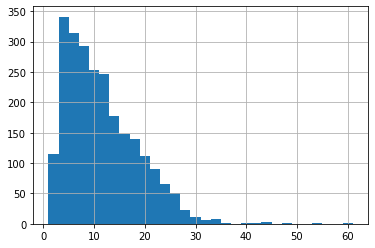

In [ ]:
# Get length of all the messages in the data set
seq_len = [len(i.split()) for i in df.Sentence]
pd.Series(seq_len).hist(bins = 30)

In [ ]:
# Maximum length of sentence in our corpus
maxlength = df['Sentence'].str.split().str.len().max()
print("The maximum length of sentence in our dataset is : " +  str(maxlength) + " words") 

The maximum length of sentence in our dataset is : 61 words


In [ ]:
# Checking for null values 
dtypes=pd.DataFrame(df.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=df.nunique()
dtypes["Null Values"]=df.isnull().sum()
dtypes["% null Values"]=df.isnull().sum()/len(df)
dtypes.style.background_gradient(cmap='Set2',axis=0)

,Data Type,Unique Values,Null Values,% null Values
Sentence,object,2382,0,0.000000
Polarity,int64,2,0,0.000000


<Figure size 504x360 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Polarities')

Text(0.5, 0, 'Polarities')

Text(0, 0.5, 'Count')

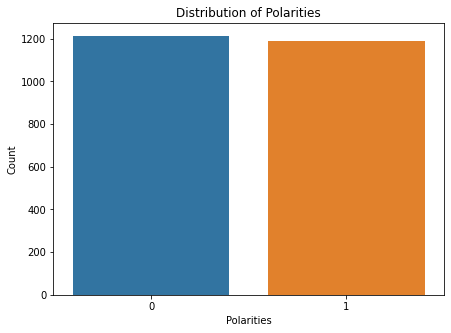

In [ ]:
# Checking the number of instance in each category
plt.figure(figsize=(7,5))

d=sns.countplot(data = df, x = 'Polarity')

plt.title('Distribution of Polarities')
plt.xlabel('Polarities')
plt.ylabel('Count')

In [ ]:
# DO NOT MODIFY THIS CELL

# Next, we'll split it into training and test
from sklearn.model_selection import train_test_split

X = df['Sentence']
y = df['Polarity']

# So that we can evaluate how well our model is performing, we split our training data
# into training and validation.

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

## Part 1.a: Preprocessing and FE Pipeline

Clean and preprocess the data (i.e., `X_train`) as you see necessary. Extract features from the text (i.e., vectorization using BOW and/or Bag of N-Grams and/or topics and/or lexical features). 


In [ ]:
# TODO: insert code here 
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1800,)
(1800,)
(600,)
(600,)


In [ ]:
%time vectorizer = TfidfVectorizer()

# Hyperparameters that I tried for this model
#vectorizer = CountVectorizer(min_df=.01, max_df=.8, ngram_range=[1,4], max_features=550)
#vectorizer = TfidfVectorizer(max_features = 1500, ngram_range=[1,7])

CPU times: user 45 µs, sys: 6 µs, total: 51 µs
Wall time: 55.1 µs


## Part 1.b: Model Training/Tuning/Cross Validation

Use your favorite shallow ML algorithm (such as decision trees, KNN, random forest, boosting variants) to train a classification model.  Don’t forget everything we’ve learned in the machine learning course: hyperparameter tuning, cross-validation, handling imbalanced data, etc. Make reasonable decisions and try to create the best-performing model that you can.


In [ ]:
# TODO: insert code here 

# Different Models tried for our use case
#model = XGBClassifier()
#model = RandomForestClassifier(random_state=223)
#model = CatBoostClassifier()

model = MultinomialNB()
pipe = Pipeline([('vec', vectorizer),  ('clf', model)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('vec', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Validation Dataset
pred_val = pipe.predict(X_val)
print(confusion_matrix(y_val, pred_val))
print(classification_report(y_val, pred_val))

[[270  53]
 [ 59 218]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       323
           1       0.80      0.79      0.80       277

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



## Part 1.c: Model Assessment 

Use your model to predict the sentiment of the testing data. Measure the performance (e.g., accuracy, AUC, F1-score) of your model. 

In [ ]:
# DO NOT MODIFY THIS CELL

test_df = pd.read_csv("https://drive.google.com/uc?export=download&id=1taoTluPBUMt9JkKAnlqDTrU49DJFpJGW")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  600 non-null    object
 1   Polarity  600 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB


In [ ]:
# TODO: insert code here 
#%time test_df['Sentence'] = test_df['Sentence'].apply(preprocess)
test_df.head(15)

,Sentence,Polarity
0,A good commentary of today's love and undoubte...,1
1,For people who are first timers in film making...,1
2,"It was very popular when I was in the cinema, ...",1
3,It's a feel-good film and that's how I felt wh...,1
4,It has northern humour and positive about the ...,1
5,I rather enjoyed it.,1
6,I liked it.,1
7,I couldn't take them seriously.,0
8,It really created a unique feeling though.,1
9,Vivian Schilling did an excellent job with the...,1


In [ ]:
# Testing the model with our Test dataset
y_test = test_df['Polarity']
X_test = test_df['Sentence']
pred_test = pipe.predict(test_df['Sentence'])
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[245  42]
 [ 93 220]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       287
           1       0.84      0.70      0.77       313

    accuracy                           0.78       600
   macro avg       0.78      0.78      0.77       600
weighted avg       0.78      0.78      0.77       600



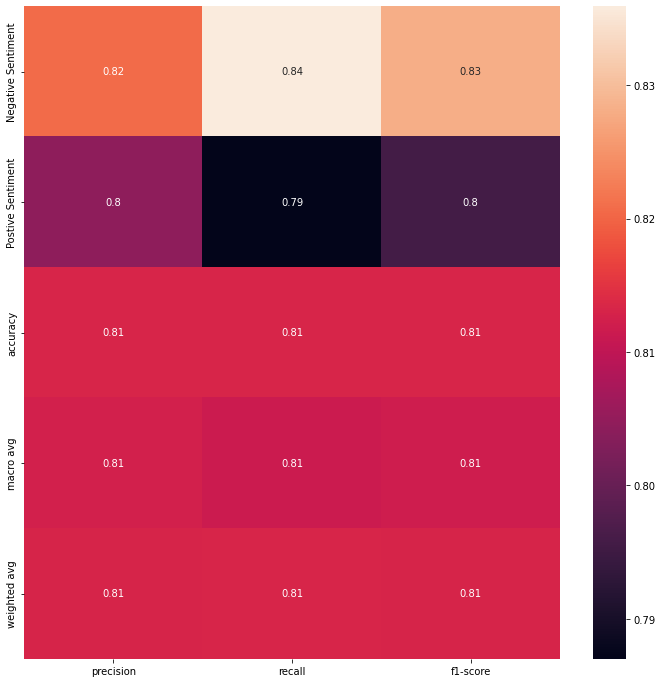

In [ ]:
# Visualizing the Classification Report
def visualize_classification_report_with_heatmap(y_test, pred_test, target_names_dict):
  fig, ax = plt.subplots(figsize=(12,12)) 
  clf_report = classification_report(y_test, pred_test,
                                    target_names=list(target_names_dict.values()),
                                    output_dict=True)
  sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
  return

# Use this dict, if cannot generate from labeled data based dictionary ('label_dict') dynamically
label_dict_fixed={0: 'Negative Sentiment',1: 'Postive Sentiment' }

visualize_classification_report_with_heatmap(y_val, pred_val, label_dict_fixed)

In [ ]:
# Model's Performance
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss

print("Accuracy = {:.2f}".format(accuracy_score(y_test, pred_test)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, pred_test)))
print("F1 Score = {:.2f}".format(f1_score(y_test, pred_test)))
print("Log Loss = {:.2f}".format(log_loss(y_test, pred_test)))

Accuracy = 0.78
Kappa = 0.55
F1 Score = 0.77
Log Loss = 7.77


In [ ]:
# Predictions 
test_df['Predicted labels'] = pred_test
test_df['Match'] = pd.NaT

for index, row in test_df.iterrows():
  if row["Polarity"] == row["Predicted labels"]:
    test_df.at[index, ["Match"]] = "Right Prediction"
  elif row["Polarity"] != row["Predicted labels"]:
    test_df.at[index, ["Match"]] = "Wrong Prediction"

prediction = ['Wrong Prediction']
test_df[test_df['Match'].isin(prediction)]

,Sentence,Polarity,Predicted labels,Match
3,It's a feel-good film and that's how I felt wh...,1,0,Wrong Prediction
12,Not too screamy not to masculine but just righ...,1,0,Wrong Prediction
14,I would have casted her in that role after rea...,1,0,Wrong Prediction
26,"I wish I could enter negative values, admins?",0,1,Wrong Prediction
34,1/10 - and only because there is no setting fo...,0,1,Wrong Prediction
...,...,...,...,...
581,I keep watching it over and over.,1,0,Wrong Prediction
582,"It's a sad movie, but very good.",1,0,Wrong Prediction
583,"If you have not seen this movie, I definitely ...",1,0,Wrong Prediction
589,":) Anyway, the plot flowed smoothly and the ma...",1,0,Wrong Prediction


In [ ]:
predictions = pd.DataFrame({'Sentence': test_df['Sentence'], 'Polarity': test_df['Polarity'],'Predicted labels': test_df['Predicted labels'], 'Match': test_df['Match'] })
print(predictions.head())

                                            Sentence  Polarity  \
0  A good commentary of today's love and undoubte...         1   
1  For people who are first timers in film making...         1   
2  It was very popular when I was in the cinema, ...         1   
3  It's a feel-good film and that's how I felt wh...         1   
4  It has northern humour and positive about the ...         1   

   Predicted labels             Match  
0                 1  Right Prediction  
1                 1  Right Prediction  
2                 1  Right Prediction  
3                 0  Wrong Prediction  
4                 1  Right Prediction  


In [ ]:
predictions.to_csv('Answers.csv', index=False)

## Part 2: Given the performance of your model, are you satisfied with the results? Explain.

Keep your response to 1000 characters or less.

Yes, I am satisfied with it. I have tried multiple vectorizers and models with hyperparameter tuning. Naive Bayes with TFIDF turned out to be the best model for our use case. 

Preprocessing our text using stop words and lemmatizing makes it challenging for our model to perform. If we look at our data set, it is closely balanced. The maximum length of a sentence is 61 words. 

I got an accuracy score of 81% for the training dataset and 78% for the test dataset. It is pretty decent for Shallow Machine Learning Model. 
Another observation, our shallow model is doing better for negative sentiments than positive sentiments with a little bit of margin. The highest value for recall of negative sentiment is 84%, and the lowest value for recall of positive sentiment is 79%


## Part 3: Show five test instances in which your model was incorrect. Dive deep and find out why your model was wrong.

Keep your response to 1000 characters or less.

Five wrong predictions:

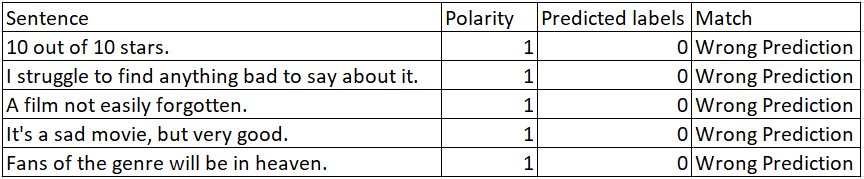

If we look at these five predictions, it is even difficult for humans to classify them. 

Removing stop words from our dataset changed the entire meaning of sentences. For example, removing the 'not' stopword from "not recommended" changes the semantics completely. These instances have both positive and negative words in a sentence which might have confused our model while making a prediction. Few statements look sarcasm, making it difficult for the Shallow model to classify them. In the case of the first example, the shallow model couldn't understand the value of the number here and hence ended up classifying them incorrectly. As a future improvement to the model, we can change numbers into words as part of preprocessing so that our model won't miss out on those instances. 


# Question 2 (Optional): Sentiment Analysis via Deep ML

This question is optional and worth up to 5 extra credit marks.

Use deep learning (e.g., RNNs and variants, CNNs and variants, and/or transformers) to build a model on the same dataset and compare the results with the Shallow ML model.

You may train your own deep ML model (using, e.g., the keras library) or use a pre-trained deep ML model (using, e.g., the transformers library).

In [ ]:
!pip install simpletransformers

In [ ]:
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer
import tensorflow as tf
from simpletransformers.classification import ClassificationModel
from sklearn.model_selection import KFold
import sklearn
from sklearn.utils import shuffle

2022-04-28 17:39:45.300400: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


Deep ML with Distilbert Transformer

In [ ]:
X = df['Sentence'].tolist()
y = df['Polarity'].tolist()

# So that we can evaluate how well our model is performing, we split our training data
# into training and validation.

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [ ]:
# TODO: Insert code here.
# Tokenzing our text using Distilbert Tokenizer from hugging face 

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

In [ ]:
def encode_text(text):
    max_length= 61
    dbert_inputs = tokenizer(text,max_length =max_length,
                            truncation=True, 
                            add_special_tokens=True, 
                            padding=True)


    return dbert_inputs
train_encodings = encode_text(X_train)   
val_encodings = encode_text(X_val)

In [ ]:
def create_dataset(encoding, label):
    dataset = tf.data.Dataset.from_tensor_slices((
    dict(encoding),
    label))

    return dataset

train_dataset = create_dataset(train_encodings, y_train)
val_dataset = create_dataset(val_encodings, y_val)

In [ ]:
# Downloading a pretarined distilbert model from hugging face and fine tunning it on our corpus

model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

optimizer = tf.keras.optimizers.RMSprop(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])
model.summary()

2022-04-28 17:46:01.159595: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'vocab_projector', 'activation_13', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint 

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_19 (Dropout)        multiple                  0         
                                                                 
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model
model.fit(train_dataset.shuffle(len(train_dataset)).batch(10), epochs=10, batch_size=32,
          validation_data=val_dataset.shuffle(len(val_dataset)).batch(10))

Epoch 1/10
180/180 [==============================] - 40s 109ms/step - loss: 0.2945 - accuracy: 0.8678 - val_loss: 0.2007 - val_accuracy: 0.9300
Epoch 2/10
180/180 [==============================] - 17s 94ms/step - loss: 0.1036 - accuracy: 0.9633 - val_loss: 0.2052 - val_accuracy: 0.9333
Epoch 3/10
180/180 [==============================] - 18s 97ms/step - loss: 0.0405 - accuracy: 0.9878 - val_loss: 0.3380 - val_accuracy: 0.9383
Epoch 4/10
180/180 [==============================] - 16s 91ms/step - loss: 0.0263 - accuracy: 0.9928 - val_loss: 0.3374 - val_accuracy: 0.9417
Epoch 5/10
180/180 [==============================] - 16s 91ms/step - loss: 0.0216 - accuracy: 0.9950 - val_loss: 0.4581 - val_accuracy: 0.9183
Epoch 6/10
180/180 [==============================] - 17s 91ms/step - loss: 0.0200 - accuracy: 0.9961 - val_loss: 0.4960 - val_accuracy: 0.9200
Epoch 7/10
180/180 [==============================] - 17s 92ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 0.5440 - val_accuracy

In [ ]:
# Validating model on Validation dataset
output_val = model.predict(val_dataset)
pred_labels_val = np.argmax(output_val.logits, axis=1)

In [ ]:
# Making prediction on Test dataset
pred_test = test_df['Sentence'].to_list()
text_encodings = encode_text(pred_test)
text_ds = tf.data.Dataset.from_tensor_slices((
    dict(text_encodings)))
output = model.predict(text_ds)
pred_labels = np.argmax(output.logits, axis=1)

In [ ]:
# Visualizing the Classification Report
print(confusion_matrix(y_test, pred_labels))
print(classification_report(y_test, pred_labels))

[[260  27]
 [ 32 281]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       287
           1       0.91      0.90      0.90       313

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



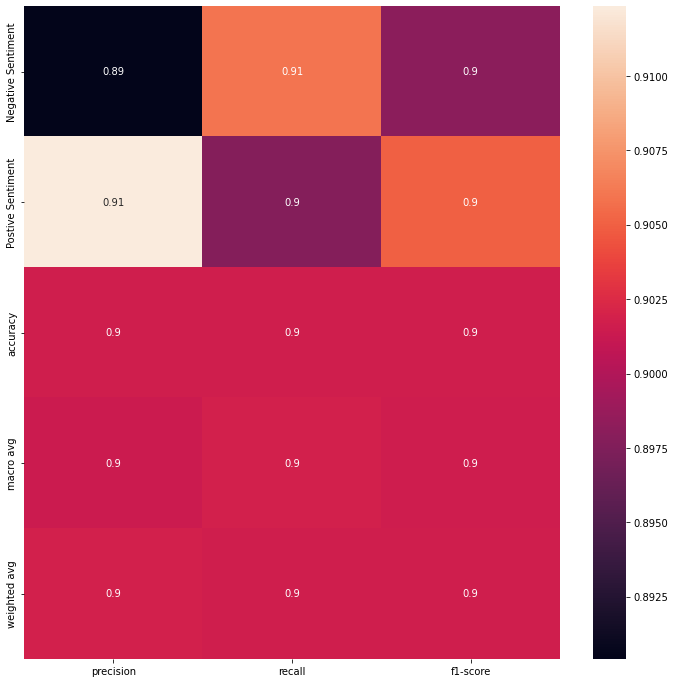

In [ ]:
visualize_classification_report_with_heatmap(y_test, pred_labels, label_dict_fixed)

In [ ]:
test_df['Predicted labels'] = pred_labels
test_df['Match'] = pd.NaT

for index, row in test_df.iterrows():
  if row["Polarity"] == row["Predicted labels"]:
    test_df.at[index, ["Match"]] = "Right Prediction"
  elif row["Polarity"] != row["Predicted labels"]:
    test_df.at[index, ["Match"]] = "Wrong Prediction"

prediction = ['Wrong Prediction']
test_df[test_df['Match'].isin(prediction)]

,Sentence,Polarity,Predicted labels,Match
10,A world better than 95% of the garbage in the ...,1,0,Wrong Prediction
14,I would have casted her in that role after rea...,1,0,Wrong Prediction
43,The last 15 minutes of movie are also not bad ...,1,0,Wrong Prediction
54,"I wasn't expecting Oscar material, but this?",0,1,Wrong Prediction
57,If only someone involved with it knew how to s...,0,1,Wrong Prediction
58,"This gets a 1 out of 10, simply because there'...",0,1,Wrong Prediction
62,Considering the relations off screen between T...,0,1,Wrong Prediction
80,The acting by the whole cast could be put on a...,0,1,Wrong Prediction
81,"And, FINALLY, after all that, we get to an end...",0,1,Wrong Prediction
90,"Totally different, with loads of understatemen...",1,0,Wrong Prediction


Deep ML with Roberta Transformer

In [ ]:
df = shuffle(df)
# prepare cross validation
n=7
kf = KFold(n_splits=n, random_state=42, shuffle=True)
results = []
accu = sklearn.metrics.accuracy_score
for train_index, val_index in kf.split(df):
    # splitting Dataframe (dataset not included)
    train_df = df.iloc[train_index]
    val_df = df.iloc[val_index]
    
    model = ClassificationModel('roberta', 'roberta-base', num_labels=2,use_cuda=True, args={'learning_rate':3e-5, 'num_train_epochs': 1, 'reprocess_input_data': True, 'overwrite_output_dir': True}) 
    model.train_model(train_df)
    result, model_outputs, wrong_predictions = model.eval_model(val_df, acc=accu)
    print(result['acc'])
    results.append(result['acc'])

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:586: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2057 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/258 [00:00<?, ?it/s]

(258, 0.3524519279021625)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/343 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/43 [00:00<?, ?it/s]

0.9446064139941691


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

  0%|          | 0/2057 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/258 [00:00<?, ?it/s]

(258, 0.36462138974389363)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/343 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/43 [00:00<?, ?it/s]

0.9446064139941691


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

  0%|          | 0/2057 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/258 [00:00<?, ?it/s]

(258, 0.3882623314857483)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/343 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/43 [00:00<?, ?it/s]

0.9475218658892128


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

  0%|          | 0/2057 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/258 [00:00<?, ?it/s]

(258, 0.36985774834950763)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/343 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/43 [00:00<?, ?it/s]

0.9212827988338192


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

  0%|          | 0/2057 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/258 [00:00<?, ?it/s]

(258, 0.3770047232162121)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/343 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/43 [00:00<?, ?it/s]

0.9620991253644315


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

  0%|          | 0/2057 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/258 [00:00<?, ?it/s]

(258, 0.3665070778639742)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/343 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/43 [00:00<?, ?it/s]

0.9650145772594753


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

  0%|          | 0/2058 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/258 [00:00<?, ?it/s]

(258, 0.37204069499821624)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/342 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/43 [00:00<?, ?it/s]

0.9502923976608187


In [ ]:
result_test, model_outputs_test, wrong_predictions_test = model.eval_model(test_df, acc=accu)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/600 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/75 [00:00<?, ?it/s]

In [ ]:
print('Accuracy : ',result_test['acc'])
print('True Positive : ',result_test['tp'])
print('False Positive : ',result_test['fp'])
print('True Negative : ',result_test['tn'])
print('False Negative : ',result_test['fn'])

Accuracy :  0.945
True Positive :  303
False Positive :  23
True Negative :  264
False Negative :  10


In [ ]:
ip = result_test['fp'] + result_test['fn']
print('Incorrect Predictions from Roberta Transformer: ', ip)
wrong_predictions_test

Incorrect Predictions from Roberta Transformer:  33


[{'guid': 36, 'text_a': "The soundtrack wasn't terrible, either.  ", 'text_b': None, 'label': 1},
 {'guid': 54, 'text_a': "I wasn't expecting Oscar material, but this?  ", 'text_b': None, 'label': 0},
 {'guid': 57, 'text_a': 'If only someone involved with it knew how to string together narrative!  ', 'text_b': None, 'label': 0},
 {'guid': 80, 'text_a': 'The acting by the whole cast could be put on a scale and balanced perfectly between overacting and underacting.  ', 'text_b': None, 'label': 0},
 {'guid': 81, 'text_a': "And, FINALLY, after all that, we get to an ending that would've been great had it been handled by competent people and not Jerry Falwell.  ", 'text_b': None, 'label': 0},
 {'guid': 99, 'text_a': 'Later I found myself lost in the power of the film.  ', 'text_b': None, 'label': 1},
 {'guid': 121, 'text_a': "Watching washing machine twirling around wouldn't hurt your eyes as much as this show.  ", 'text_b': None, 'label': 0},
 {'guid': 156, 'text_a': 'Both films are terrib